In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [3]:
data.shape

(23412, 21)

In [4]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]  
data.head()  

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [5]:
data.describe()

,Latitude,Longitude,Depth,Magnitude
count,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531
std,30.113183,125.511959,122.651898,0.423066
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.653000,-76.349750,14.522500,5.600000
50%,-3.568500,103.982000,33.000000,5.700000
75%,26.190750,145.026250,54.000000,6.000000
max,86.005000,179.998000,700.000000,9.100000


In [6]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+t+'', '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
         timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()


,Latitude,Longitude,Depth,Magnitude,Timestamp


In [7]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]  
y = final_data[['Magnitude', 'Depth']]  

In [8]:
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [10]:
clf = DecisionTreeClassifier(random_state=42)

In [11]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

In [12]:
#testing and splitting
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)  

NameError: name 'train_test_split' is not defined

In [ ]:
py -m pip install RandomForestRegressor

In [ ]:
pip install sklearn

In [ ]:
pip install  RandomForestRegressor

In [ ]:
pip install yfinance

In [ ]:
#testing the model
reg.score(X_test, y_test)  


0.9999625

In [ ]:
from sklearn.model_selection import GridSearchCV  
  
parameters = {'n_estimators':[10, 20, 50, 100, 200, 500]}  
  
grid_obj = GridSearchCV(reg, parameters)  
grid_fit = grid_obj.fit(X_train, y_train)  
best_fit = grid_fit.best_estimator_  
best_fit.predict(X_test)  

array([1. , 0. , 2. , 1. , 1.1, 0. , 1. , 2. , 1. , 1. , 2. , 0. , 0. ,
       0. , 0. , 1. , 2. , 1. , 1. , 2. , 0. , 1.9, 0. , 2. , 2. , 2. ,
       2. , 2. , 0. , 0. ])

In [ ]:
#accuracy
best_fit.score(X_test, y_test)  

0.995

In [ ]:
#neural model
from keras.models import Sequential  
from keras.layers import Dense  
  
def create_model(neurons, activation, optimizer, loss):  
    model = Sequential()  
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))  
    model.add(Dense(neurons, activation=activation))  
    model.add(Dense(2, activation='softmax'))  
      
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])  
      
    return model  

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier  
  
model = KerasClassifier(build_fn=create_model, verbose=0)  
  
# neurons = [16, 64, 128, 256]  
neurons = [16]  
# batch_size = [10, 20, 50, 100]  
batch_size = [10]  
epochs = [10]  
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']  
activation = ['sigmoid', 'relu']  
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']  
optimizer = ['SGD', 'Adadelta']  
loss = ['squared_hinge']  
  
param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)  

In [ ]:
pip install keras

In [ ]:
pip install keras==2.12.0

In [ ]:
pip uninstall tensorflow
pip install tensorflow==2.12.0


In [ ]:
pip install tensorflow==2.12.0

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)  
grid_result = grid.fit(X_train, y_train)  
  
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))  
means = grid_result.CV_results_['mean_test_score']  
stds = grid_result.CV_results_['std_test_score']  
params = grid_result.CV_results_['params']  
for mean, stdev, param in zip(means, stds, params):  
    print("%f (%f) with: %r" % (mean, stdev, param))  

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = Sequential()  
model.add(Dense(16, activation='relu', input_shape=(3,)))  
model.add(Dense(16, activation='relu'))  
model.add(Dense(2, activation='softmax'))  
  
model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])  

In [ ]:
#data visualization 
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+t+'', '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
         timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Timestamp


In [ ]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


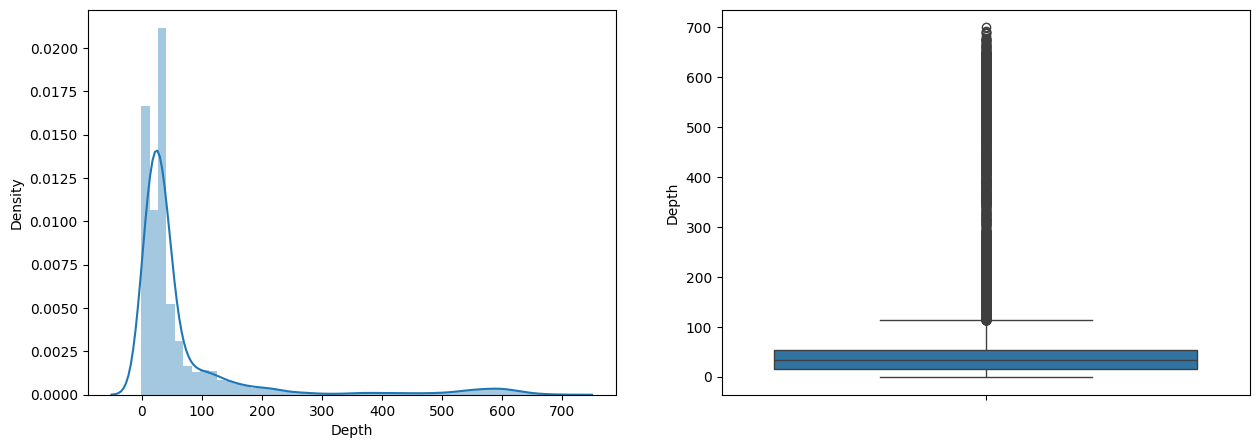

In [ ]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sb.distplot(data['Depth'])

plt.subplot(1, 2, 2)
sb.boxplot(data['Depth'])

plt.show()


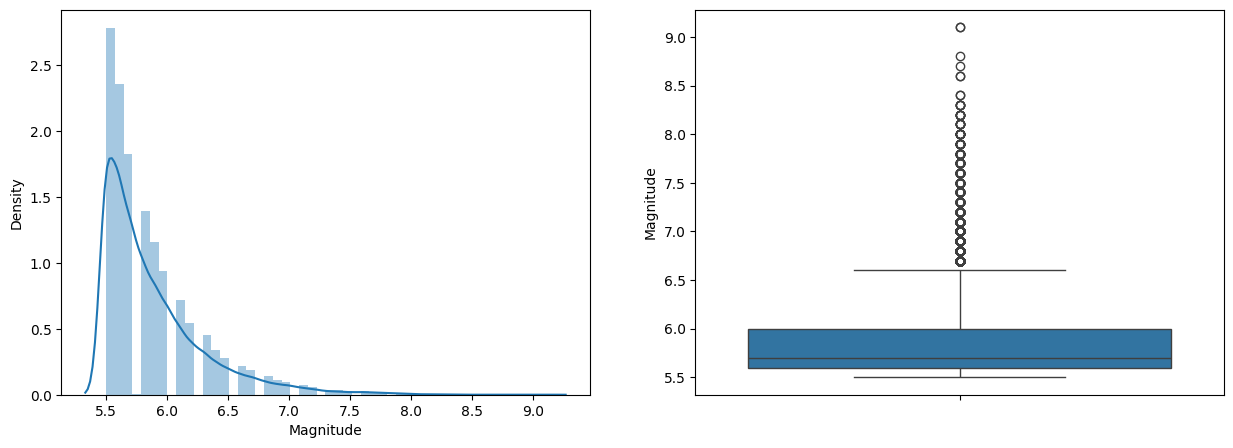

In [ ]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sb.distplot(data['Magnitude'])

plt.subplot(1, 2, 2)
sb.boxplot(data['Magnitude'])

plt.show()


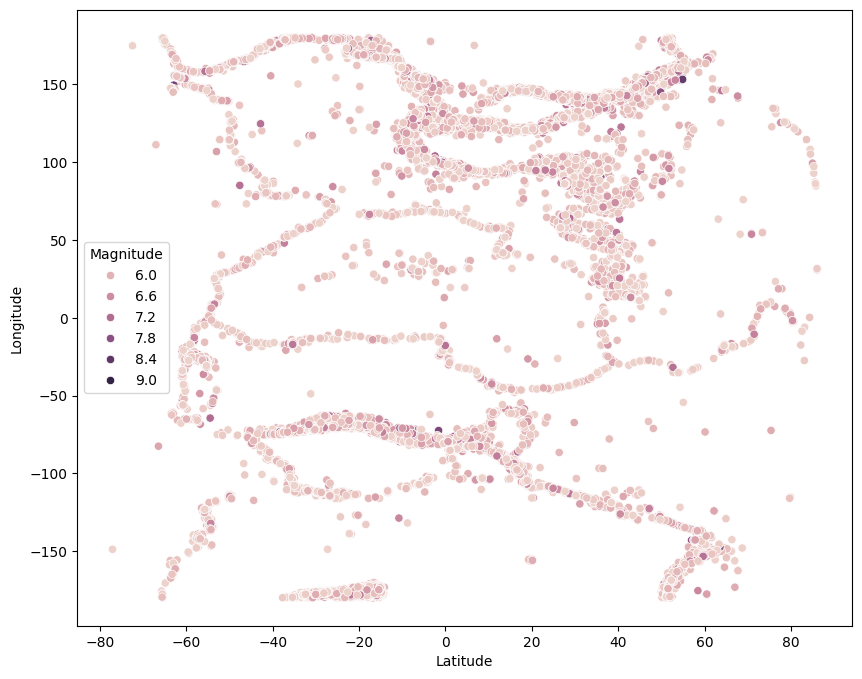

In [ ]:
plt.figure(figsize=(10, 8))
sb.scatterplot(data=data,
			x='Latitude',
			y='Longitude',
			hue='Magnitude')
plt.show()


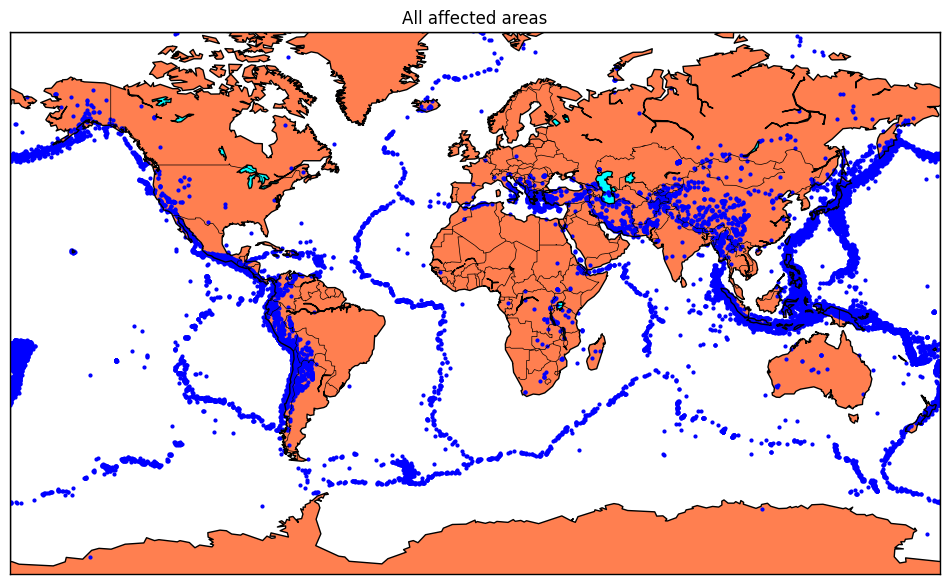

In [ ]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()